In [ ]:
!pip install xgboost imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("heart_disease_2020.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
data.shape

(319795, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
data['HeartDisease'].value_counts(True)*100

No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64

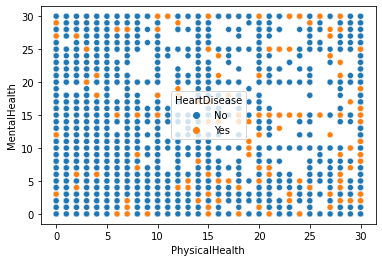

In [ ]:
sns.scatterplot(data = data, x ='PhysicalHealth', y = 'MentalHealth', hue = 'HeartDisease')

In [ ]:
correlation  = pd.get_dummies(data,drop_first=True).corr()

In [ ]:
correlation['HeartDisease_Yes']*100

BMI                                      5.180319
PhysicalHealth                          17.072097
MentalHealth                             2.859071
SleepTime                                0.832665
HeartDisease_No                       -100.000000
HeartDisease_Yes                       100.000000
Smoking_No                             -10.776416
Smoking_Yes                             10.776416
AlcoholDrinking_No                       3.207974
AlcoholDrinking_Yes                     -3.207974
Stroke_No                              -19.683530
Stroke_Yes                              19.683530
DiffWalking_No                         -20.125805
DiffWalking_Yes                         20.125805
Sex_Female                              -7.004048
Sex_Male                                 7.004048
AgeCategory_18-24                       -7.538524
AgeCategory_25-29                       -6.575891
AgeCategory_30-34                       -6.561073
AgeCategory_35-39                       -6.668474


In [ ]:
m_data = data.copy()
m_data.loc[(m_data['AgeCategory'] == '25-29') |\
           (m_data['AgeCategory'] == '30-34') | \
           (m_data['AgeCategory'] == '35-39') |\
           (m_data['AgeCategory'] == '40-44') |\
           (m_data['AgeCategory'] == '45-49') \
           ,['AgeCategory']] = '25 - 49'

m_data.loc[(m_data['AgeCategory'] == '50-54') |\
           (m_data['AgeCategory'] == '55-59') \
           ,['AgeCategory']] = '50 - 59'

m_data.loc[(m_data['AgeCategory'] == '60-64') |\
           (m_data['AgeCategory'] == '65-69') \
           ,['AgeCategory']] = '60 - 69'

In [ ]:
m_data['AgeCategory'].unique()

array(['50 - 59', '80 or older', '60 - 69', '75-79', '25 - 49', '70-74',
       '18-24'], dtype=object)

In [ ]:
m_data.loc[(m_data['Race'] == 'Black'),['Race']] = 'Other'

In [ ]:
m_correlation  = pd.get_dummies(m_data,drop_first=True).corr()
m_correlation['HeartDisease_Yes']*100

BMI                                   5.180319
PhysicalHealth                       17.072097
MentalHealth                          2.859071
SleepTime                             0.832665
HeartDisease_Yes                    100.000000
Smoking_Yes                          10.776416
AlcoholDrinking_Yes                  -3.207974
Stroke_Yes                           19.683530
DiffWalking_Yes                      20.125805
Sex_Male                              7.004048
AgeCategory_25 - 49                 -15.938710
AgeCategory_50 - 59                  -3.357348
AgeCategory_60 - 69                   4.433171
AgeCategory_70-74                     8.257842
AgeCategory_75-79                     9.868954
AgeCategory_80 or older              14.304106
Race_Asian                           -3.026210
Race_Hispanic                        -3.616301
Race_Other                           -1.031087
Race_White                            4.012146
Diabetic_No, borderline diabetes      1.618242
Diabetic_Yes 

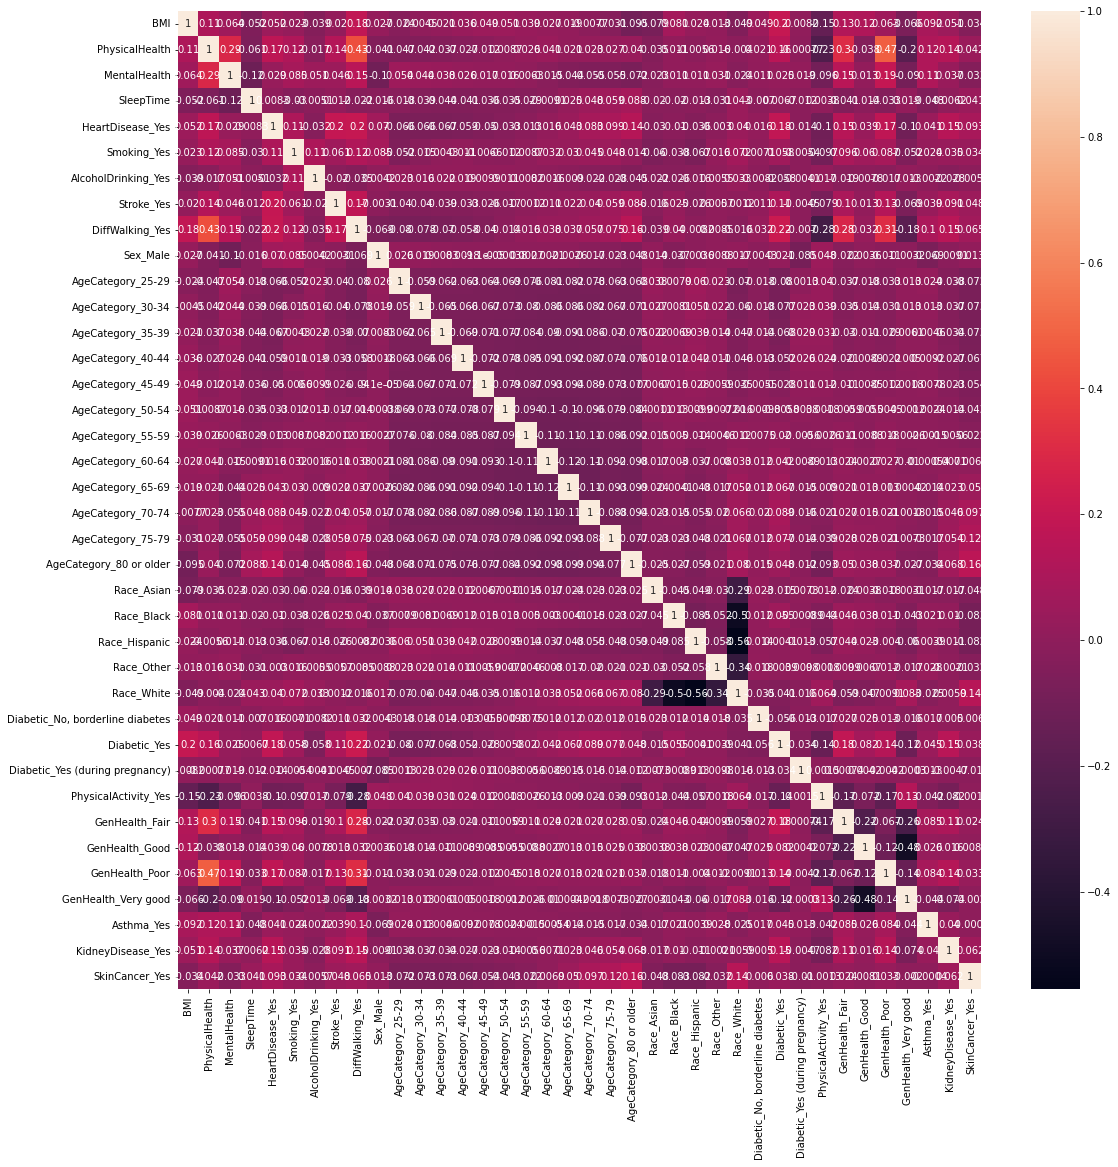

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(correlation,cbar= True,annot=True)
plt.show()

In [ ]:
correlation['Race_White']*100

BMI                                  -4.906018
PhysicalHealth                       -0.396820
MentalHealth                         -2.448918
SleepTime                             4.290510
HeartDisease_Yes                      4.012146
Smoking_Yes                           7.236715
AlcoholDrinking_Yes                   3.334152
Stroke_Yes                            0.115429
DiffWalking_Yes                      -1.551648
Sex_Male                              1.731402
AgeCategory_25-29                    -6.959003
AgeCategory_30-34                    -6.009373
AgeCategory_35-39                    -4.690039
AgeCategory_40-44                    -4.611502
AgeCategory_45-49                    -3.474058
AgeCategory_50-54                    -1.639607
AgeCategory_55-59                     1.191168
AgeCategory_60-64                     3.257324
AgeCategory_65-69                     5.245145
AgeCategory_70-74                     6.611810
AgeCategory_75-79                     6.699801
AgeCategory_8

In [ ]:
pd.get_dummies(m_data,drop_first=True).var(numeric_only=False)

BMI                                 40.400010
PhysicalHealth                      63.216019
MentalHealth                        63.285767
SleepTime                            2.062116
HeartDisease_Yes                     0.078269
Smoking_Yes                          0.242340
AlcoholDrinking_Yes                  0.063460
Stroke_Yes                           0.036316
DiffWalking_Yes                      0.119586
Sex_Male                             0.249389
AgeCategory_25 - 49                  0.213804
AgeCategory_50 - 59                  0.142692
AgeCategory_60 - 69                  0.167129
AgeCategory_70-74                    0.087704
AgeCategory_75-79                    0.062662
AgeCategory_80 or older              0.069822
Race_White                           0.178830
Diabetic_No, borderline diabetes     0.020755
Diabetic_Yes                         0.111310
Diabetic_Yes (during pregnancy)      0.007938
PhysicalActivity_Yes                 0.174176
GenHealth_Fair                    

In [ ]:
m_data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Removing outliers

##Balancing dataset - Oversampling

In [ ]:
X = m_data.drop('HeartDisease',axis=1)
y = m_data['HeartDisease']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float64
 1   Smoking           319795 non-null  object 
 2   AlcoholDrinking   319795 non-null  object 
 3   Stroke            319795 non-null  object 
 4   PhysicalHealth    319795 non-null  float64
 5   MentalHealth      319795 non-null  float64
 6   DiffWalking       319795 non-null  object 
 7   Sex               319795 non-null  object 
 8   AgeCategory       319795 non-null  object 
 9   Race              319795 non-null  object 
 10  Diabetic          319795 non-null  object 
 11  PhysicalActivity  319795 non-null  object 
 12  GenHealth         319795 non-null  object 
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  object 
 15  KidneyDisease     319795 non-null  object 
 16  SkinCancer        31

In [ ]:
from imblearn.over_sampling import SMOTENC
smote = SMOTENC([1,2,3,6,7,8,9,10,11,12,14,15,16],random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X, y)

In [ ]:
print('X sample :',X_oversample.shape)
print('Y_sample :',y_oversample.shape)

X sample : (584844, 17)
Y_sample : (584844,)


In [ ]:
y_oversample.value_counts(normalize=True)*100

No     50.0
Yes    50.0
Name: HeartDisease, dtype: float64

In [ ]:
y_dummy = y_oversample.apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
balanced_data = X_oversample.copy()
balanced_data['HeartDisease'] = y_dummy

##Preprocessing

In [ ]:
y_dummy = y_oversample.apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_oversample,y_dummy,test_size = 0.4,random_state=2)
X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test,test_size = 0.5,random_state=2)

In [ ]:
X_validation.shape

(116969, 17)

In [ ]:
y_train.value_counts(True)*100

0    50.110571
1    49.889429
Name: HeartDisease, dtype: float64

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
cat_columns = [i for i in X_oversample.columns if data[i].dtype == 'object']
cat_columns

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [ ]:
num_columns = [i for i in data.columns if data[i].dtype != 'object' and i not in ['BMI']]
num_columns 

['PhysicalHealth', 'MentalHealth', 'SleepTime']

In [ ]:
num_pipe = make_pipeline(SimpleImputer(missing_values=np.nan,strategy = 'mean'),
    StandardScaler(), SimpleImputer(missing_values=np.nan,strategy = 'mean')
)

cat_pipe = make_pipeline(SimpleImputer(missing_values=np.nan,strategy = 'most_frequent'),
    OneHotEncoder(handle_unknown='ignore',drop='if_binary'),
    SimpleImputer(missing_values=np.nan,strategy = 'most_frequent')
)

In [ ]:
full_pipe = ColumnTransformer([('num', num_pipe, num_columns),
    ('cat', cat_pipe, cat_columns)
])

In [ ]:
def cm(arr):
  return pd.DataFrame({'Predicted Yes':arr[0],'Predicted No':arr[1]},index= ['Actual Yes','Actual No'])

##Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_oversample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584844 entries, 0 to 584843
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               584844 non-null  float64
 1   Smoking           584844 non-null  object 
 2   AlcoholDrinking   584844 non-null  object 
 3   Stroke            584844 non-null  object 
 4   PhysicalHealth    584844 non-null  float64
 5   MentalHealth      584844 non-null  float64
 6   DiffWalking       584844 non-null  object 
 7   Sex               584844 non-null  object 
 8   AgeCategory       584844 non-null  object 
 9   Race              584844 non-null  object 
 10  Diabetic          584844 non-null  object 
 11  PhysicalActivity  584844 non-null  object 
 12  GenHealth         584844 non-null  object 
 13  SleepTime         584844 non-null  float64
 14  Asthma            584844 non-null  object 
 15  KidneyDisease     584844 non-null  object 
 16  SkinCancer        58

## Logistic Regression

In [ ]:
LR_data = sample_data.copy()

Identify Outliers in Dataset.

In [ ]:
def outliers(features,df):
  Q1 = df[[features]].quantile(q = 0.25)[0]
  Q3 = df[[features]].quantile(q = 0.75)[0]
  iqr = Q3 - Q1
  min_iqr = Q1 - 1.5*iqr
  max_iqr = Q3 + 1.5*iqr
  return min_iqr,max_iqr,df[[features]].min()[0],df[[features]].max()[0]

def convert_nan(x,min_iqr ,max_iqr ):
    if (x > max_iqr):
      x=np.nan
    else:
      x = x
    return x

for i in ['BMI','SleepTime']:
  c=0
  min_iqr,max_iqr,min_value,max_value = outliers(i,LR_data)
  if min_value < min_iqr:
    c+=1
    print('Column ->',i)
    print('--->low bound Outliers at',min_iqr)
  if max_value > max_iqr:
    if c==0:
      print('Column ->',i)
    print('--------->uppar bound Outliers at',max_iqr)
  print()
  print('Conver outliers to nan\n')
  
  LR_data[i] = LR_data[i].map(lambda x: np.nan if x<min_iqr or x >max_iqr else x )
  

Column -> BMI
--->low bound Outliers at 13.10801780201053
--------->uppar bound Outliers at 43.24835902920484

Conver outliers to nan

Column -> SleepTime
--->low bound Outliers at 3.0
--------->uppar bound Outliers at 11.0

Conver outliers to nan



In [ ]:
LR_data.isna().sum()

BMI                 17805
Smoking                 0
AlcoholDrinking         0
Stroke                  0
PhysicalHealth          0
MentalHealth            0
DiffWalking             0
Sex                     0
AgeCategory             0
Race                    0
Diabetic                0
PhysicalActivity        0
GenHealth               0
SleepTime            8893
Asthma                  0
KidneyDisease           0
SkinCancer              0
HeartDisease            0
dtype: int64

In [ ]:
X = LR_data.drop('HeartDisease',axis=1)
y = LR_data['HeartDisease']

In [ ]:
y.value_counts(True)

0    0.5
1    0.5
Name: HeartDisease, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=2)
X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test,test_size = 0.5,random_state=2)

In [ ]:
LR = make_pipeline(full_pipe, LogisticRegression(max_iter=10000))
LR.fit(X_train,y_train)
y_lr_predict = LR.predict(X_validation)
print('LogisticRegression accuracy:',(accuracy_score(y_validation,y_lr_predict))*100)

LogisticRegression accuracy: 77.2837247475827


In [ ]:
LR['logisticregression'].coef_

array([[-0.01176164,  0.07683905, -0.0422321 ,  0.38044548, -1.020114  ,
         0.85340038,  0.2613698 ,  0.71968012, -2.97666139, -1.34086259,
        -0.23452493,  0.35451587,  0.69511698,  0.90418418,  1.23405634,
        -0.95989887, -1.13721545, -0.06260578,  0.11380579,  0.68173878,
         0.26714764, -0.54311839,  0.78593676, -1.87414153,  0.05068752,
        -1.51737673,  0.45988314, -0.17816517,  0.78190458, -0.91042134,
         0.15866649,  0.09747485, -0.05333177]])

In [ ]:
from sklearn.metrics import confusion_matrix
cm(confusion_matrix(y_validation,y_lr_predict))

,Predicted Yes,Predicted No
Actual Yes,43295,11716
Actual No,14855,47103


## Null Value test

In [ ]:
import random
null_test_data = X_test.copy()

In [ ]:
column_list = null_test_data.columns
for i in range(1000):
  r_index = random.randint(0,null_test_data.shape[0]-1)
  column = column_list[random.randint(0,len(column_list)-1)]
  null_test_data.loc[null_test_data.index == r_index,column] = np.nan

In [ ]:
null_test_data.isna().sum()

BMI                 17
Smoking             20
AlcoholDrinking     13
Stroke              32
PhysicalHealth      31
MentalHealth        19
DiffWalking         19
Sex                 33
AgeCategory         25
Race                22
Diabetic            21
PhysicalActivity    33
GenHealth           23
SleepTime           24
Asthma              34
KidneyDisease       30
SkinCancer          33
dtype: int64

In [ ]:
RF.predict(null_test_data)

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_oversample,y_dummy,test_size = 0.4,random_state=2)
X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test,test_size = 0.5,random_state=2)

## KNn

In [ ]:
# Sample out data from quick results

sample_data = X_oversample.copy()
sample_data['HeartDisease'] = y_dummy

In [ ]:
s_data = sample_data.sample (5000,random_state=134)
X = s_data.drop('HeartDisease',axis=1)
y = s_data['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=2)
X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test,test_size = 0.5,random_state=2)

In [ ]:
def hyperparam_tune(minimun, maximum, mdl,param,skip=1):
  model_accuracy = dict()
  for i in range(minimun,maximum,skip):
    params = {param:i}
    m = mdl
    m[1].set_params(**params)
    m.fit(X_train,y_train)
    y_model_predict = m.predict(X_validation)
    model_accuracy[i] = (accuracy_score(y_validation,y_model_predict))*100
  model_data = pd.DataFrame({"Accuracy":list(model_accuracy.keys()),"value":list(model_accuracy.values())})
  plt.scatter(model_data['Accuracy'],model_data['value'])
  plt.xlabel('K value')
  plt.ylabel('Accuracy')

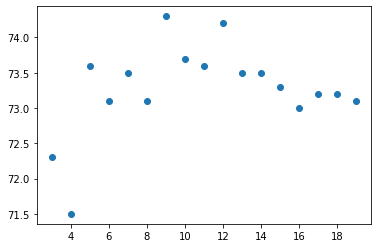

In [ ]:
knn = make_pipeline(full_pipe,KNeighborsClassifier())
hyperparam_tune(minimun=3,maximum=20,mdl = knn,param='n_neighbors')

In [ ]:
knn = make_pipeline(full_pipe,KNeighborsClassifier(n_neighbors=9))
knn.fit(X_train,y_train)
y_knn_predict = knn.predict(X_validation)
print('knn accuracy:',(accuracy_score(y_validation,y_knn_predict))*100)

knn accuracy: 74.3


In [ ]:
predict = knn.predict(X_test)
print('knn accuracy:',(accuracy_score(y_test,predict))*100)

knn accuracy: 75.5


In [ ]:
cm(confusion_matrix(y_test,predict))

,Predicted Yes,Predicted No
Actual Yes,372,98
Actual No,147,383


In [ ]:
DT = make_pipeline(full_pipe,DecisionTreeClassifier())
DT.fit(X_train,y_train)
y_predict = DT.predict(X_test)

print('Decision Tree accuracy:',(accuracy_score(y_test,y_predict))*100)

cm(confusion_matrix(y_test,y_predict))

Decision Tree accuracy: 76.6


,Predicted Yes,Predicted No
Actual Yes,390,105
Actual No,129,376


In [ ]:
RF = make_pipeline(full_pipe,RandomForestClassifier())
RF.fit(X_train,y_train)
y_predict = RF.predict(X_test)

print('Random Forest Tree accuracy:',(accuracy_score(y_test,y_predict))*100)

cm(confusion_matrix(y_test,y_predict))

Random Forest Tree accuracy: 78.10000000000001


,Predicted Yes,Predicted No
Actual Yes,380,80
Actual No,139,401


In [ ]:
def print_all_codes(n, m):
  def print_01_codes(current, num_digits):
    if num_digits == 0:

      print(current)

    else:

      print_01_codes('0' + current, num_digits - 1)

      print_01_codes('1' + current, num_digits - 1)

  upper_bound = 0

  while True:
    for i in range(upper_bound): 
      print_01_codes('', n) 
    if upper_bound > m:

      break

    upper_bound += 1

print_all_codes(1,4)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
